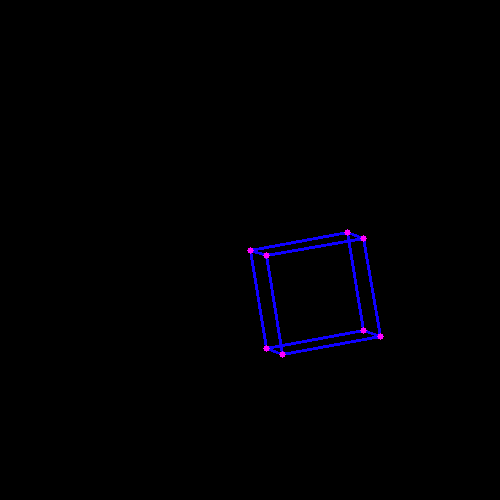

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    for e in edges:
        cv.line(im, tuple(vertices[e[0]][:2].astype(int)), tuple(vertices[e[1]][:2].astype(int)), (255, 0, 15), 2)
    for v in vertices:
        cv.circle(im, tuple(v[:2].astype(int)), 3, (255, 0, 255), -1)

def rotate_x(angle):
    """Matriz de rotación en el eje X"""
    angle_rad = np.radians(angle)
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(angle_rad), -np.sin(angle_rad), 0],
                     [0, np.sin(angle_rad), np.cos(angle_rad), 0],
                     [0, 0, 0, 1]])

def rotate_y(angle):
    """Matriz de rotación en el eje Y"""
    angle_rad = np.radians(angle)
    return np.array([[np.cos(angle_rad), 0, np.sin(angle_rad), 0],
                     [0, 1, 0, 0],
                     [-np.sin(angle_rad), 0, np.cos(angle_rad), 0],
                     [0, 0, 0, 1]])

def rotate_z(angle):
    """Matriz de rotación en el eje Z"""
    angle_rad = np.radians(angle)
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0, 0],
                     [np.sin(angle_rad), np.cos(angle_rad), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

def project3D(vertices, d=500):
    """Aplica una proyección 3D"""
    projection_matrix = np.array([[1, 0, 0, 0],
                                  [0, 1, 0, 0],
                                  [0, 0, 1, -1/d]])

    return np.dot(vertices, projection_matrix.T)

def translate(vertices, dx, dy):
    # Implementa la función de translación
    translation_matrix = np.array([[1, 0, 0, dx], [0, 1, 0, dy], [0, 0, 1, 0], [0, 0, 0, 1]])  # Agregar columna de ceros
    v = translation_matrix @ vertices.T
    return v.T


# Cubo definido en su sistema coordenado
v = np.array([[0, 100, 100, 1], [0, 100, 0, 1], [100, 100, 0, 1], [100, 0, 0, 1],
              [100, 0, 100, 1], [0, 0, 100, 1], [0, 0, 0, 1], [100, 100, 100, 1]])
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (5, 6), (1, 6), (6, 3), (7, 4), (0, 7), (7, 2)]

# Rotar en los ejes X, Y y Z
v = np.dot(v, rotate_x(angle=30).T)
v = np.dot(v, rotate_y(angle=80).T)
v = np.dot(v, rotate_z(angle=20).T)

# Trasladar el cubo a la parte inferior derecha
v = translate(v, dx=250, dy=250)

# Parámetros de la cámara
d = 500  # Distancia de la cámara al plano de proyección

# Proyectar los vértices en 3D
v_projected = project3D(v, d=d)

# Dibujar y mostrar
im = np.zeros((500, 500, 3), np.uint8)
draw(v_projected, edges, im)
cv2_imshow(im)